In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\Lenovo\miniconda3\envs\dogcat_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo\miniconda3\envs\dogcat_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo\miniconda3\envs\dogcat_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo\minicon

In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))


In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [5]:
# Adding a second convolutional layer
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
training_set = train_datagen.flow_from_directory('D:\Data_House\dogcat',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 1000 images belonging to 2 classes.


In [7]:
test_set = test_datagen.flow_from_directory('D:\Data_House\dogcat',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [8]:
model = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 2000)

classifier.save("model.h5")
print("Saved model to disk")



Epoch 1/1
8000/8000 [==============================] - 3690s 461ms/step - loss: 0.1660 - accuracy: 0.9283 - val_loss: 0.0018 - val_accuracy: 0.9960
Saved model to disk


In [9]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [10]:
# Part 3 - Making new predictions
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('D:\Data_House\dogcat\cat\cat.60.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#result = model.predict(test_image)
model = load_model("model.h5")
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat


In [11]:
result 

array([[0.]], dtype=float32)

In [12]:
# Part 3 - Making new predictions
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('D:\Data_House\dogcat\dog\dog.117.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#result = model.predict(test_image)
model = load_model("model.h5")
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

dog


In [13]:
result

array([[1.]], dtype=float32)

In [20]:
#check kernal value
import numpy as np
arr=np.load("D:\\0_INeuron\\Deep_Learning\\4 CNN overview\\dogcat_new\\kernel_0.npy")
arr[0]

array([[[-0.14722277,  0.13093628,  0.09124506,  0.03608083,
         -0.07993122,  0.016264  ,  0.02353416, -0.10275161,
          0.1001033 ,  0.04922502, -0.0357214 , -0.10589561,
         -0.04438684, -0.08467416, -0.15294635, -0.06052738,
         -0.07868981,  0.13083799,  0.15835777,  0.11408958,
          0.09901716, -0.08409314,  0.07526281,  0.05106651,
          0.07308725, -0.0544529 ,  0.05045587, -0.11431721,
          0.06804132,  0.01922518, -0.14855053,  0.12553824],
        [ 0.08586348, -0.09243858, -0.02059917, -0.05941663,
          0.02451792,  0.13212754,  0.08723122, -0.04101313,
          0.07811294, -0.06585567,  0.1351519 ,  0.00039735,
          0.14022394,  0.06586437, -0.06694348, -0.06019154,
         -0.1278741 , -0.1203718 , -0.05577296, -0.11128356,
         -0.07042979, -0.06203102,  0.00411707,  0.08561955,
          0.04575222,  0.07270279,  0.11968943,  0.10560224,
          0.07252265, -0.06019312, -0.1257217 ,  0.11124414],
        [-0.04597282, 

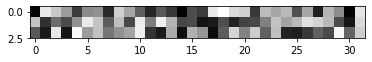

In [27]:
# view kernal 
from matplotlib import pyplot as plt 

plt.imshow(arr[0][0], cmap='gray')
plt.show()